In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os
import cv2
from joblib import dump, load
# import tensorflow as tf

In [5]:
import subprocess

def get_gpu_details():
    try:
        result = subprocess.run(['nvidia-smi'], capture_output=True)
        output = result.stdout.decode('utf-8')
        print(output)
    except FileNotFoundError:
        print("nvidia-smi not found. Please make sure NVIDIA drivers are installed.")

# Call the function to display GPU details
get_gpu_details()

Thu May  2 16:36:53 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.67                 Driver Version: 536.67       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   50C    P8               4W /  54W |    217MiB /  4096MiB |      3%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
# dir_raw_dataset = r'../MyDrive/RMIT/machine learning/Asm2/Furniture_Data'
dir_raw_dataset = 'Furniture_Data/Furniture_Data'
main_folder_path = dir_raw_dataset

In [8]:
# List all sub-folders in the main folder
sub_folders = [sub_folder for sub_folder in os.listdir(main_folder_path) if os.path.isdir(os.path.join(main_folder_path, sub_folder))]
print(sub_folders)

['beds', 'chairs', 'dressers', 'lamps', 'sofas', 'tables']


In [38]:
def load_csv(dataset_folder, label, prompt = ""):
    # Folder path containing the images
    folder_path = dataset_folder  # Replace with the actual folder path

    # List all files in the folder
    file_list = os.listdir(folder_path)
    data_csv = []
    for file_name in file_list:
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        # print(file_path)

        data_csv.append([file_path, label])
    return data_csv



In [44]:
csv_data = []
for sub_folder in sub_folders:
      print("Accessing folder " + sub_folder)
      sub_folder_path = os.path.join(main_folder_path, sub_folder)
      # print(sub_folder_path)
      category_folders = [category_folder for category_folder in os.listdir(sub_folder_path) if os.path.isdir(os.path.join(sub_folder_path, category_folder))]
      # print(category_folders)
      for category_folder in category_folders:
        category_folder_path = os.path.join(sub_folder_path, category_folder)
        # print(category_folder_path)
        datas = load_csv(category_folder_path, sub_folder)
        csv_data.extend(datas)

print('Load succesffuly')


Accessing folder beds
Accessing folder chairs
Accessing folder dressers
Accessing folder lamps
Accessing folder sofas
Accessing folder tables
Load succesffuly


In [45]:
# Specify the file path and mode (e.g., 'w' for writing)

import os
import csv

file_path = 'Furnitures/clean_data.csv'

# Check if the directory exists
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)  # Create the directory if it does not exist

# Check if the file exists
if not os.path.isfile(file_path):
    with open(file_path, 'w') as file:
        file.write('')  # Create the file if it does not exist


# Open the CSV file in write mode and create a CSV writer object

with open(file_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["ImgPath", "Class"])

    # Write the data to the CSV file row by row
    for row in csv_data:
        writer.writerow(row)
        
print('Data has been written to the CSV file.')

Data has been written to the CSV file.


In [49]:
# Load the dataset for Exploratory Data Analysis purpose
data_eda = pd.read_csv('./Furnitures/clean_data.csv')

# Replace each class number into a furniture type
for id, category in enumerate(sub_folders):
    data_eda['Class'] = data_eda['Class'].replace(id, category)

data_eda.rename(columns = {"Class": "Type"}, inplace = True)

print(data_eda) # Print the data frame
data_eda.info()

                                                 ImgPath    Type
0      Furniture_Data/Furniture_Data\beds\Asian\19726...    beds
1      Furniture_Data/Furniture_Data\beds\Asian\20027...    beds
2      Furniture_Data/Furniture_Data\beds\Asian\20109...    beds
3      Furniture_Data/Furniture_Data\beds\Asian\20508...    beds
4      Furniture_Data/Furniture_Data\beds\Asian\20750...    beds
...                                                  ...     ...
90079  Furniture_Data/Furniture_Data\tables\Victorian...  tables
90080  Furniture_Data/Furniture_Data\tables\Victorian...  tables
90081  Furniture_Data/Furniture_Data\tables\Victorian...  tables
90082  Furniture_Data/Furniture_Data\tables\Victorian...  tables
90083  Furniture_Data/Furniture_Data\tables\Victorian...  tables

[90084 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90084 entries, 0 to 90083
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ImgPath

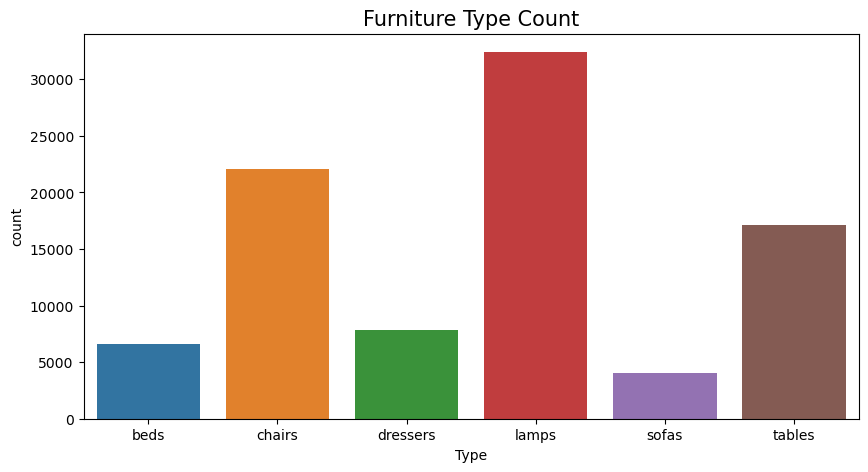

lamps       32402
chairs      22053
tables      17100
dressers     7871
beds         6578
sofas        4080
Name: Type, dtype: int64

In [52]:
# Plot bar graph
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.countplot(x = data_eda.Type)
plt.title("Furniture Type Count", fontsize = 15)
plt.show()

data_eda.Type.value_counts()